In [197]:
# IMPORTS
import pandas as pd
from math import sqrt
from random import seed
from random import randrange
import statistics
import sys
from pprint import pprint

In [198]:
seed(2)
# DATA
data = pd.read_csv("./data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [199]:
# Cleaning Data
data.drop(['id'], axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1,'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


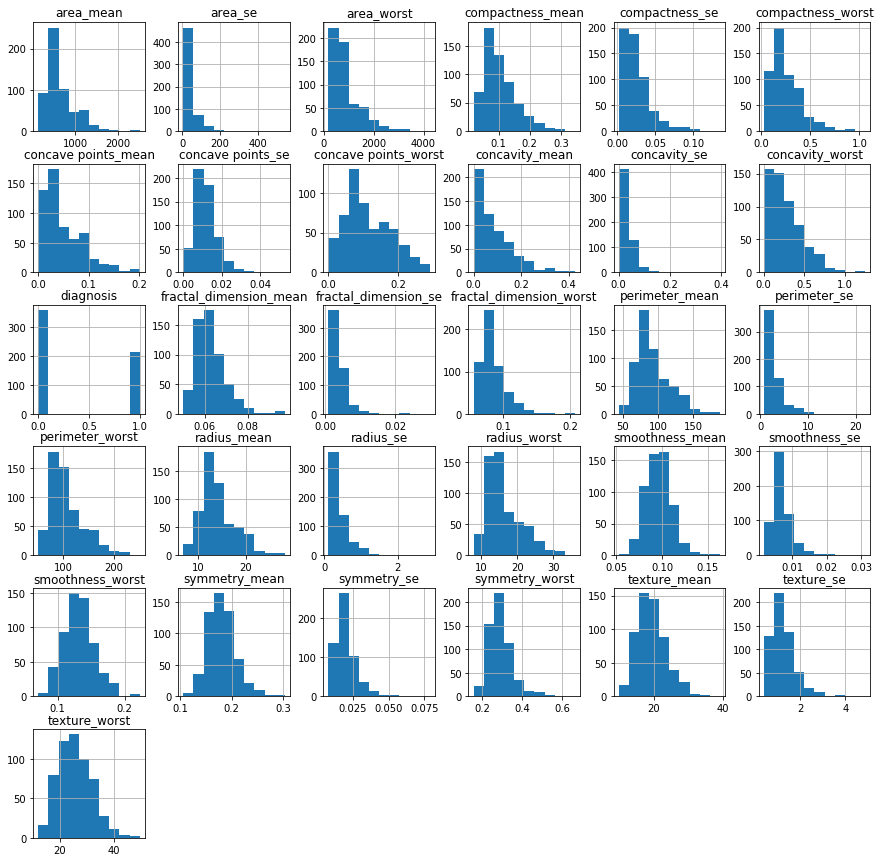

In [200]:
 pd.DataFrame.hist(data, figsize = [15,15]);

In [201]:
## Decision Tree
def build_tree(dataset, min_sample_size, max_depth):
    random_index = randrange(1, len(dataset[0])) # 0 index is the label
    root = build_node(dataset, random_index)
    build_children(root, max_depth, min_sample_size, 1) 
    return root

# Build a node. A node contains: index, value, groups (this will be removed by children)
def build_node(dataset, index):
    class_labels = list(set([row[0] for row in dataset]))
    node_index, node_value, best_gini_gained, node_groups = -1, -1, -1, None
    for row in dataset:
        groups = split_groups(index, row[index], dataset)
        gini_gained = calc_gini_gained(groups, class_labels)
        if gini_gained > best_gini_gained:
            node_index = index
            node_value = row[index]
            best_GI_score = gini_gained
            node_groups = groups
    return {'index': node_index, 'value': node_value, 'groups': node_groups}    

# Split to left and right by value
def split_groups(index, value, dataset):
    left = []
    right = []
    for row in dataset:
        if row[index] < value: 
            left.append(row)
        else: 
            right.append(row)
    return left, right

# Calculate impurity of parent = (1 - sum(p^2)) for each class label
def calc_gini_parent(groups, class_labels):
    all_rows = [row for group in groups for row in group]
    size = len(all_rows)
    score = 0
    for label in class_labels:
        p = [row[0] for row in all_rows].count(label) / size
        score += p * p;
    return 1 - score

# Calculate impurity for the split = parent impurity - sum of child impurities
def calc_gini_gained(groups, classes):
    parent_size = float(sum([len(group) for group in groups]))
    gini_gained = calc_gini_parent(groups, classes)
    for group in groups:
        group_size = float(len(group))
        # avoid divide by zero
        if group_size == 0:
            continue
        group_score = 0.0 # accumulate score of each group
        for class_val in classes:
            p = [row[0] for row in group].count(class_val) / group_size
            group_score += p * p
        # weight the group score by its relative size
        gini_gained -= (1.0 - group_score) * (group_size / parent_size)
    return gini_gained

def build_children(node, max_depth, min_size, depth): 
    left, right = node['groups'] # Extract groups information from parent node
    del node['groups'] # Remove groups
    
    # If parent node is empty
    if not left or not right: 
        node['left'] = node['right'] = build_terminal_node(left + right)
        return 
    
    # if max depth is reached
    if depth >= max_depth:
        node['left'] = build_terminal_node(left)
        node['right'] = build_terminal_node(right)
        return 
    
    # For left child: 
    ## Too little sample
    if (len(left) <= min_size):
        node['left'] = build_terminal_node(left)
    else:
        random_index = randrange(1, len(left[0])) 
        node['left'] = build_node(left, random_index)
        build_children(node['left'], max_depth, min_size, depth + 1)
    if (len(right) <= min_size):
        node['right'] = build_terminal_node(right)
    else:
        random_index = randrange(1, len(right[0]))
        node['right'] = build_node(right, random_index)
        build_children(node['right'], max_depth, min_size, depth + 1)

def build_terminal_node(group):
    labels = [row[0] for row in group]
    return max(set(labels), key=labels.count)

def predict_from_tree(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict): # check if it's terminal
            return predict_from_tree(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict): # check if it's terminal
            return predict_from_tree(node['right'], row)
        else:
            return node['right']

In [202]:
## Forest
def build_forest(train, n_trees, max_depth=5, min_size=1, sample_ratio=1):
    trees = []
    for i in range(n_trees):
        sample = []
        n_sample = len(train) * sample_ratio
        while len(sample) < n_sample:
            index = randrange(len(train))
            sample.append(train[index])
        tree = build_tree(sample, min_size, max_depth)
        trees.append(tree)
    return trees

def random_forest(train, test, n_trees=5, max_depth=5, min_size=1, sample_ratio=1):
#     print("\n# of train=", len(train), 
#           ",# of test=", len(test), 
#           ",n_trees=", n_trees, 
#           ",max_depth=", max_depth, 
#           ",min_size=", min_size, 
#           ",sample_ratio=", sample_ratio)
    trees = build_forest(train, n_trees, max_depth=5, min_size=1, sample_ratio=1)
    predictions = []
    for row in test:
        row_prediction = [predict_from_tree(tree, row) for tree in trees]
        predictions.append(max(set(row_prediction), key=row_prediction.count))
    return predictions

In [203]:
## Evaluation
# Split data in particular ratio for train and test
def split_data(data, ratio=0.7):
    shuffle_df = data.sample(frac=1)
    train_size = int(ratio * len(data))
    train_set = shuffle_df[:train_size]
    test_set = shuffle_df[train_size:]
    return train_set, test_set

def cross_validation_split(dataframe, n_folds):
    dataframe_split = list()
    dataframe_copy = dataframe
    for i in range(n_folds):
        left_fold = n_folds - i
        fold_fraction = float(1/left_fold)
        fold = dataframe_copy.sample(frac=fold_fraction)
        dataframe_split.append(fold)
        dataframe_copy = dataframe_copy.drop(fold.index)
    return dataframe_split

def evaluate_algorithm(dataframe, n_folds, algo, *args):
    confusion_matrices = []
    folds = cross_validation_split(dataframe, n_folds)
    for i in range(len(folds)):
        l_without_i = folds[:i] + folds[(i + 1):]
        train = pd.concat(l_without_i)
        test = folds[i]
        test_labels = [row[0] for row in test.values.tolist()]
        predictions = algo(train.values.tolist(), test.values.tolist(), *args)
        matrix = confusion_matrix(test_labels, predictions)
        confusion_matrices.append(matrix)
        print("Completed cross-test ", i + 1, ", remained: ", len(folds) - i - 1)
    
    summary = {
        "Average Accuracy" : round(statistics.mean(
            [Accuracy(mat) for mat in confusion_matrices])*100, 2),
        "Average True Positive" : round(statistics.mean(
            [True_Positive_rate(mat) for mat in confusion_matrices])*100, 2),
        "Average True Negative" : round(statistics.mean(
            [True_Negative_rate(mat) for mat in confusion_matrices])*100, 2),
        "Average Precision" : round(statistics.mean(
            [Precision(mat) for mat in confusion_matrices])*100, 2)
    }
    
    print("\n\nSummary of", n_folds, 
          "folds cross-validation is:\n")
    pprint(summary)
    return summary

def confusion_matrix(test,predicted):
    y_actu = pd.Series(test, name='Actual')
    y_pred = pd.Series(predicted, name='Predicted')
    df_confusion = pd.crosstab(y_actu, y_pred)
    #Predicted        0        1
    #Actual
    # 0              TN        FP
    # 1              FN        TP
    return df_confusion

def Accuracy(matrix):
    #AC = (TN + TP) / (TN + FP + FN + TP)
    accracy = (matrix[0][0] + matrix[1][1]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1])
#     print("Accuracy: {:.2f}".format(accracy))
    return accracy
    
def True_Positive_rate(matrix):
    #TPR = TP / (FN + TP)
    TPR = matrix[1][1] / (matrix[0][1] + matrix[1][1])
#     print("True Positive Rate: {:.2f}".format(TPR))
    return TPR

def True_Negative_rate(matrix):
    #TNR = FP / (TN + FP)
    TNR = matrix[0][1] / (matrix[0][0] + matrix[0][1])
#     print("True Negative Rate: {:.2f}".format(TNR))
    return TNR
    
def Precision(matrix):
    #precision = TP / (FP + TP)
    precision = matrix[1][1] / (matrix[0][1] + matrix[1][1])
#     print("Precision: {:.2f}".format(precision))
    return precision

In [204]:
evaluate_algorithm(data, 5, random_forest, 20, 7, 10, 0.7)

Completed cross-test  1 , remained:  4
Completed cross-test  2 , remained:  3
Completed cross-test  3 , remained:  2
Completed cross-test  4 , remained:  1
Completed cross-test  5 , remained:  0


Summary of 5 folds cross-validation is:

{'Average Accuracy': 92.62,
 'Average Precision': 83.62,
 'Average True Negative': 9.1,
 'Average True Positive': 83.62}


{'Average Accuracy': 92.62,
 'Average True Positive': 83.62,
 'Average True Negative': 9.1,
 'Average Precision': 83.62}

In [205]:
# Feature Importance
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

def display_gini_Importance_features(data,ration):
    X = data.iloc[:,1:31]
    # Create a list of feature names
    feat_labels = X.columns
    
    Y = data.iloc[:,0]
    
    # Split the data into 40% test and 60% training
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ration, random_state=0)
    
    # Create a random forest classifier
    clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Print the name and gini importance of each feature
    for feature in zip(feat_labels, clf.feature_importances_):
         print(feature)
            
def get_gini_Importance_features(data,ration,threshold):
    X = data.iloc[:,1:31]
    # Create a list of feature names
    feat_labels = X.columns
    
    Y = data.iloc[:,0]
    
    # Split the data into 40% test and 60% training
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ration, random_state=0)
    
     # Create a random forest classifier
    clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Create a selector object that will use the random forest classifier to identify
    # features that have an importance of more than 0.015
    sfm = SelectFromModel(clf, threshold=threshold)

    # Train the selector
    sfm.fit(X_train, y_train)
    
    # Print the names of the most important features
    important_feature_list = ['diagnosis']
    for feature_list_index in sfm.get_support(indices=True):
        print(feat_labels[feature_list_index])
        important_feature_list.append(feat_labels[feature_list_index])
    return important_feature_list

def execute_algo_with_important_features(data):
    #get important features list
    print("Important features are: ")
    important_feature_list = get_gini_Importance_features(data,0.4,0.015)
    
    #transform data to important feature
    important_feature_data = data[important_feature_list]
    
    print()
    print("Execute Random forest only with imporatant feature")
    # Create a new random forest classifier for the most important features
    evaluate_algorithm(important_feature_data, 5, random_forest, 20, 7, 10, 0.7)
    
display_gini_Importance_features(data,0.4)
print("The scores above are the importance scores for each variable. And all the importance scores add up to 100%.")
execute_algo_with_important_features(data)


('radius_mean', 0.03351929929811478)
('texture_mean', 0.011133822946841997)
('perimeter_mean', 0.045196071613029826)
('area_mean', 0.03294887735115322)
('smoothness_mean', 0.005689983110131631)
('compactness_mean', 0.015269673488826593)
('concavity_mean', 0.07557273234167254)
('concave points_mean', 0.14384835749783342)
('symmetry_mean', 0.004340812477959023)
('fractal_dimension_mean', 0.0037638088880767775)
('radius_se', 0.014930707151808281)
('texture_se', 0.0047124860543599646)
('perimeter_se', 0.01357063242520368)
('area_se', 0.035520238576549096)
('smoothness_se', 0.004094125841653456)
('compactness_se', 0.0047738756106799505)
('concavity_se', 0.006356614211409637)
('concave points_se', 0.006331386780208187)
('symmetry_se', 0.0032979925004250057)
('fractal_dimension_se', 0.005155795406384495)
('radius_worst', 0.08446857764272364)
('texture_worst', 0.012876687224029225)
('perimeter_worst', 0.11386756389229268)
('area_worst', 0.08531778995660412)
('smoothness_worst', 0.0126408734920

In [207]:
print("----------------------------------Report----------------------------------------")
print("Original model which contain all 30 features has accuracy 92.62")
print("While our limited model which conatain 13 features has accuracy 92.8")
print("Thus, we halved the number of features in the model and also incresed the accuracy.")

----------------------------------Report----------------------------------------
Original model which contain all 30 features has accuracy 92.62
While our limited model which conatain 13 features has accuracy 92.8
Thus, we halved the number of features in the model and also incresed the accuracy.


In [243]:
#PCA (Principal Component Analysis)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def PCA_Analysis():
    X = data.iloc[:,1:31]
    y = data.iloc[:,0]

    # Standardizing the features
    x = StandardScaler().fit_transform(X)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2'])
    finalDf = pd.concat([data[['diagnosis']],principalDf], axis = 1)
    finalDf.head()
    
    #Visualize 2D Projection
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [1, 0]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['diagnosis'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()
    
    #evaluate Random forest
    print("Execute Random Forest with PCA components:")
    evaluate_algorithm(finalDf, 5, random_forest, 20, 7, 10, 0.7)

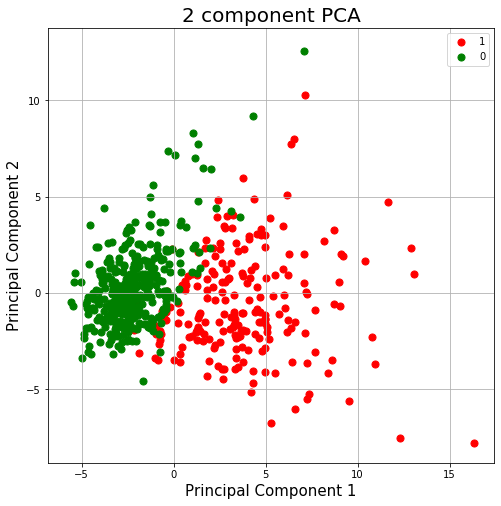

Execute Random Forest with PCA components
Completed cross-test  1 , remained:  4
Completed cross-test  2 , remained:  3
Completed cross-test  3 , remained:  2
Completed cross-test  4 , remained:  1
Completed cross-test  5 , remained:  0


Summary of 5 folds cross-validation is:

{'Average Accuracy': 80.86,
 'Average Precision': 99.05,
 'Average True Negative': 0.26,
 'Average True Positive': 99.05}


In [244]:
PCA_Analysis()

In [245]:
print("----------------------------------Report----------------------------------------")
print("Original model which contain all 30 features has accuracy 92.62")
print("While our limited model which conatain 2 PCA componets has accuracy 80.86")
print("We achieved optimal level of accuracy while significantly reducing the number of features in the dataset")

----------------------------------Report----------------------------------------
Original model which contain all 30 features has accuracy 92.62
While our limited model which conatain 2 PCA componets has accuracy 80.86
We achieved optimal level of accuracy while significantly reducing the number of features in the dataset


In [1]:
print("done")

done
